In [1]:
import matplotlib.pyplot as plt

In [2]:
from pkg.kinect import *

In [3]:
pyK4A = init_kinect()

Device configuration: 
	color_format: 3 
	(0:JPG, 1:NV12, 2:YUY2, 3:BGRA32)

	color_resolution: 1 
	(0:OFF, 1:720p, 2:1080p, 3:1440p, 4:1536p, 5:2160p, 6:3072p)

	depth_mode: 3 
	(0:OFF, 1:NFOV_2X2BINNED, 2:NFOV_UNBINNED,3:WFOV_2X2BINNED, 4:WFOV_UNBINNED, 5:Passive IR)

	camera_fps: 2 
	(0:5 FPS, 1:15 FPS, 2:30 FPS)

	synchronized_images_only: False 
	(True of False). Drop images if the color and depth are not synchronized

	depth_delay_off_color_usec: 0 ms. 
	Delay between the color image and the depth image

	wired_sync_mode: 0
	(0:Standalone mode, 1:Master mode, 2:Subordinate mode)

	subordinate_delay_off_master_usec: 0 ms.
	The external synchronization timing.

	disable_streaming_indicator: False 
	(True or False). Streaming indicator automatically turns on when the color or depth camera's are in use.




In [7]:
cameraMatrix, distCoeffs = get_calibration(pyK4A)

In [8]:
color_image, transformed_depth_image = get_image_set(pyK4A)

uint8


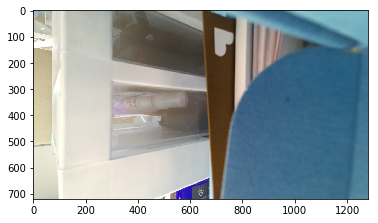

In [9]:
color_image = color_image.copy()
color_image_bak = color_image.copy()
plt.imshow(color_image)
print(color_image.dtype)

In [10]:
disconnect_kinect(pyK4A)

In [66]:
dictionary = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)
params = aruco.DetectorParameters_create()

aruco_map = {'box1':[ObjectMarker(0, 0.05, SE3(Rot_zyx(0,0,0), [-0.05,0,0])),
                     ObjectMarker(1, 0.05, SE3(Rot_zyx(0,0,0), [0.05,0,0]))]}
# aruco_map = {'box1':[ObjectMarker(0, SE3(Rot_zyx(0,0,0), 0.05, [0,0,0])),
#                      ObjectMarker(1, SE3(Rot_zyx(np.pi/2,0,0), 0.05, [0,0,0])),
#                      ObjectMarker(2, SE3(Rot_zyx(np.pi,0,0), 0.05, [0,0,0])),
#                      ObjectMarker(3, SE3(Rot_zyx(np.pi*3/2,0,0), 0.05, [0,0,0]))]}

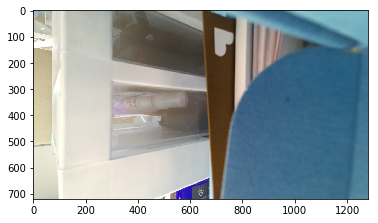

In [67]:
color_image = color_image_bak.copy()
plt.imshow(color_image)

In [68]:
mk0 = dictionary.drawMarker(0, 240)
mk1 = dictionary.drawMarker(1, 240)
color_image[240:480, 240:480] = np.expand_dims(mk0, axis=-1)
color_image[240:480, 720:960] = np.expand_dims(mk1, axis=-1)

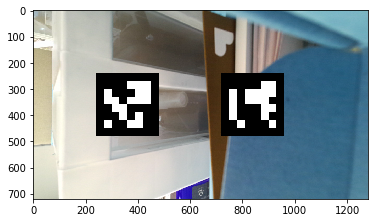

In [69]:
plt.imshow(color_image)

In [63]:
objectPose_dict = get_object_pose_dict(color_image, aruco_map, dictionary, cameraMatrix, distCoeffs)

[1]:[[[720. 240.]
  [959. 240.]
  [959. 479.]
  [720. 479.]]]
[0]:[[[240. 240.]
  [479. 240.]
  [479. 479.]
  [240. 479.]]]


In [64]:
color_image_out = color_image.copy()
axis_len = 0.05
for k,v in objectPose_dict.items():
    rvec,_ = cv2.Rodrigues(v[:3,:3])
    tvec = v[:3,3]
    aruco.drawAxis(color_image_out, cameraMatrix, distCoeffs, rvec,tvec, axis_len)

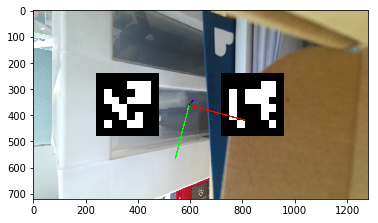

In [65]:
plt.imshow(cv2.cvtColor(color_image_out, cv2.COLOR_BGR2RGB))

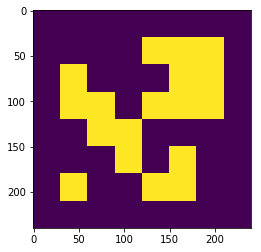

In [36]:
plt.imshow(dictionary.drawMarker(0, 240))